In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate a large dataset with 1000 employees
n_employees = 1000

# Generate employee data
employee_ids = np.arange(1, n_employees + 1)

# Names - combining first and last names
first_names = ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Henry', 
               'Isabella', 'Jack', 'Kate', 'Liam', 'Mia', 'Noah', 'Olivia', 'Peter',
               'Quinn', 'Rachel', 'Sam', 'Tina', 'Uma', 'Victor', 'Wendy', 'Xavier',
               'Yara', 'Zoe', 'Aaron', 'Bella', 'Chris', 'Diana', 'Ethan', 'Fiona']

last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller',
              'Davis', 'Rodriguez', 'Martinez', 'Hernandez', 'Lopez', 'Gonzalez',
              'Wilson', 'Anderson', 'Thomas', 'Taylor', 'Moore', 'Jackson', 'Martin',
              'Lee', 'Perez', 'Thompson', 'White', 'Harris', 'Sanchez', 'Clark']

names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(n_employees)]

# Ages (18-65)
ages = np.random.randint(18, 66, n_employees)

# Cities
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia',
          'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville',
          'Fort Worth', 'Columbus', 'Charlotte', 'San Francisco', 'Indianapolis',
          'Seattle', 'Denver', 'Washington', 'Boston', 'El Paso', 'Nashville',
          'Detroit', 'Oklahoma City', 'Portland', 'Las Vegas', 'Memphis', 'Louisville',
          'Baltimore', 'Milwaukee', 'Albuquerque', 'Tucson', 'Fresno', 'Sacramento']

city_list = np.random.choice(cities, n_employees)

# Departments
departments = ['HR', 'Engineering', 'Marketing', 'Finance', 'Sales', 'Operations',
               'Legal', 'IT', 'Customer Service', 'Research & Development']
department_list = np.random.choice(departments, n_employees)

# Job Titles based on departments
job_titles_map = {
    'HR': ['HR Manager', 'Recruiter', 'HR Specialist', 'Payroll Specialist'],
    'Engineering': ['Software Engineer', 'Senior Engineer', 'DevOps Engineer', 'QA Engineer'],
    'Marketing': ['Marketing Manager', 'Digital Marketer', 'Content Creator', 'SEO Specialist'],
    'Finance': ['Financial Analyst', 'Accountant', 'Finance Manager', 'Budget Analyst'],
    'Sales': ['Sales Representative', 'Sales Manager', 'Account Executive', 'Business Development'],
    'Operations': ['Operations Manager', 'Process Analyst', 'Operations Coordinator'],
    'Legal': ['Legal Counsel', 'Paralegal', 'Compliance Officer'],
    'IT': ['System Administrator', 'Network Engineer', 'IT Support', 'Database Administrator'],
    'Customer Service': ['Customer Service Rep', 'Support Manager', 'Customer Success Manager'],
    'Research & Development': ['Research Scientist', 'R&D Engineer', 'Product Developer']
}

job_titles = [random.choice(job_titles_map[dept]) for dept in department_list]

# Salaries (correlated with age, department, and job level)
base_salaries = {
    'HR': 55000, 'Engineering': 85000, 'Marketing': 60000, 'Finance': 70000,
    'Sales': 65000, 'Operations': 58000, 'Legal': 95000, 'IT': 75000,
    'Customer Service': 45000, 'Research & Development': 90000
}

salaries = []
for i, dept in enumerate(department_list):
    base = base_salaries[dept]
    # Add age factor and random variation
    age_factor = (ages[i] - 22) * 1000  # Experience factor
    random_factor = np.random.randint(-15000, 25000)
    salary = max(30000, base + age_factor + random_factor)  # Minimum salary of 30k
    salaries.append(salary)

# Years of Experience
years_experience = np.maximum(0, ages - np.random.randint(18, 25, n_employees))

# Performance Ratings (1-5 scale)
performance_ratings = np.random.choice([1, 2, 3, 4, 5], n_employees, 
                                     p=[0.05, 0.15, 0.4, 0.3, 0.1])  # Realistic distribution

# Education Levels
education_levels = np.random.choice(['High School', 'Bachelor\'s', 'Master\'s', 'PhD'], 
                                  n_employees, p=[0.2, 0.5, 0.25, 0.05])

# Employment Status
employment_status = np.random.choice(['Full-time', 'Part-time', 'Contract'], 
                                   n_employees, p=[0.8, 0.15, 0.05])

# Gender
gender = np.random.choice(['Male', 'Female', 'Other'], n_employees, p=[0.48, 0.48, 0.04])

# Start dates (within last 10 years)
start_date = datetime.now() - timedelta(days=10*365)
start_dates = [start_date + timedelta(days=np.random.randint(0, 10*365)) 
               for _ in range(n_employees)]

# Bonus (percentage of salary)
bonus_percentages = np.random.normal(0.1, 0.05, n_employees)  # 10% average with variation
bonus_percentages = np.clip(bonus_percentages, 0, 0.3)  # Cap at 30%
bonuses = [int(salaries[i] * bonus_percentages[i]) for i in range(n_employees)]

# Remote work days per week
remote_days = np.random.choice([0, 1, 2, 3, 4, 5], n_employees, 
                             p=[0.3, 0.2, 0.2, 0.15, 0.1, 0.05])

# Satisfaction scores (1-10)
satisfaction_scores = np.random.normal(7, 1.5, n_employees)
satisfaction_scores = np.clip(satisfaction_scores, 1, 10)
satisfaction_scores = np.round(satisfaction_scores, 1)

# Create the comprehensive DataFrame
data = {
    'EmployeeID': employee_ids,
    'Name': names,
    'Age': ages,
    'Gender': gender,
    'City': city_list,
    'Department': department_list,
    'JobTitle': job_titles,
    'Salary': salaries,
    'YearsExperience': years_experience,
    'PerformanceRating': performance_ratings,
    'EducationLevel': education_levels,
    'EmploymentStatus': employment_status,
    'StartDate': start_dates,
    'Bonus': bonuses,
    'RemoteDaysPerWeek': remote_days,
    'SatisfactionScore': satisfaction_scores
}

df = pd.DataFrame(data)

# Display basic info about the dataset
print("🎉 Large Employee Dataset Generated!")
print(f"Dataset Shape: {df.shape}")
print(f"Total Employees: {len(df)}")
print(f"Number of Columns: {len(df.columns)}")
print("\n" + "="*50)
print("COLUMN INFORMATION:")
print("="*50)
for col in df.columns:
    print(f"• {col}: {df[col].dtype}")

print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
df.head()

🎉 Large Employee Dataset Generated!
Dataset Shape: (1000, 16)
Total Employees: 1000
Number of Columns: 16

COLUMN INFORMATION:
• EmployeeID: int32
• Name: object
• Age: int32
• Gender: object
• City: object
• Department: object
• JobTitle: object
• Salary: int32
• YearsExperience: int32
• PerformanceRating: int32
• EducationLevel: object
• EmploymentStatus: object
• StartDate: datetime64[ns]
• Bonus: int64
• RemoteDaysPerWeek: int32
• SatisfactionScore: float64

FIRST 5 ROWS:


,EmployeeID,Name,Age,Gender,City,Department,JobTitle,Salary,YearsExperience,PerformanceRating,EducationLevel,EmploymentStatus,StartDate,Bonus,RemoteDaysPerWeek,SatisfactionScore
0,1,Henry Smith,56,Female,Tucson,Customer Service,Customer Success Manager,79434,32,5,Master's,Full-time,2023-05-27 20:43:02.234793,10665,1,8.5
1,2,Rachel Davis,46,Female,Washington,IT,Network Engineer,94233,25,2,Bachelor's,Full-time,2017-04-18 20:43:02.234793,16029,0,7.6
2,3,Olivia Jones,32,Female,Jacksonville,HR,Recruiter,51141,12,4,Master's,Full-time,2017-01-13 20:43:02.234793,4339,0,5.5
3,4,Grace Perez,60,Female,New York,Operations,Process Analyst,99019,40,4,Bachelor's,Part-time,2022-03-30 20:43:02.234793,16566,0,5.0
4,5,Frank Jackson,25,Male,Portland,Customer Service,Customer Success Manager,53384,4,3,Bachelor's,Full-time,2021-03-01 20:43:02.234793,4822,1,7.2


## 📊 PANDAS OPERATIONS - PRACTICE EXAMPLES

In [24]:
# 1. BASIC DATA EXPLORATION
print("=== BASIC INFO ===")
print(f"Shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")

# 2. FILTERING AND SELECTION
print("\n=== FILTERING EXAMPLES ===")
# High earners (>80k)
high_earners = df[df['Salary'] > 80000]
print(f"High earners (>80k): {len(high_earners)} employees")

# Engineering department
engineers = df[df['Department'] == 'Engineering']
print(f"Engineers: {len(engineers)} employees")

# Multiple conditions
senior_engineers = df[(df['Department'] == 'Engineering') & (df['YearsExperience'] > 5)]
print(f"Senior Engineers: {len(senior_engineers)} employees")

=== BASIC INFO ===
Shape: (1000, 16)
Data types:
EmployeeID                    int32
Name                         object
Age                           int32
Gender                       object
City                         object
Department                   object
JobTitle                     object
Salary                        int32
YearsExperience               int32
PerformanceRating             int32
EducationLevel               object
EmploymentStatus             object
StartDate            datetime64[ns]
Bonus                         int64
RemoteDaysPerWeek             int32
SatisfactionScore           float64
dtype: object

Missing values:
EmployeeID           0
Name                 0
Age                  0
Gender               0
City                 0
Department           0
JobTitle             0
Salary               0
YearsExperience      0
PerformanceRating    0
EducationLevel       0
EmploymentStatus     0
StartDate            0
Bonus                0
RemoteDaysPerWeek    0

In [25]:
# 3. GROUPBY OPERATIONS
print("=== GROUPBY EXAMPLES ===")

# Average salary by department
dept_salary = df.groupby('Department')['Salary'].agg(['mean', 'median', 'count'])
print("Average salary by department:")
print(dept_salary.sort_values('mean', ascending=False))

# Performance by education level
edu_performance = df.groupby('EducationLevel')['PerformanceRating'].mean()
print(f"\nPerformance by education:\n{edu_performance}")

# Multiple groupby
city_dept_stats = df.groupby(['City', 'Department']).agg({
    'Salary': 'mean',
    'Age': 'mean',
    'SatisfactionScore': 'mean'
}).round(2)
print(f"\nCity-Department statistics (first 10 rows):")
print(city_dept_stats.head(10))

=== GROUPBY EXAMPLES ===
Average salary by department:
                                 mean    median  count
Department                                            
Legal                   119121.138298  120630.5     94
Research & Development  113151.602410  114256.0     83
Engineering             109170.260417  108102.0     96
IT                      100867.298077  101090.0    104
Finance                  96890.342593   97090.5    108
Sales                    89166.138889   90272.0    108
Marketing                85951.056075   86798.0    107
Operations               81928.821782   81943.0    101
HR                       78157.978495   80716.0     93
Customer Service         67462.367925   68586.5    106

Performance by education:
EducationLevel
Bachelor's     3.207101
High School    3.167513
Master's       3.218254
PhD            2.886364
Name: PerformanceRating, dtype: float64

City-Department statistics (first 10 rows):
                                       Salary    Age  Satisfac

## 🔢 NUMPY OPERATIONS - PRACTICE EXAMPLES

In [26]:
# NUMPY OPERATIONS WITH OUR DATASET
print("=== NUMPY OPERATIONS ===")

# Convert columns to numpy arrays
salaries_np = df['Salary'].values
ages_np = df['Age'].values
performance_np = df['PerformanceRating'].values

print(f"Salary array shape: {salaries_np.shape}")
print(f"Salary array dtype: {salaries_np.dtype}")

# Statistical operations
print(f"\nSalary Statistics:")
print(f"Mean: ${np.mean(salaries_np):,.2f}")
print(f"Median: ${np.median(salaries_np):,.2f}")
print(f"Std Dev: ${np.std(salaries_np):,.2f}")
print(f"Min: ${np.min(salaries_np):,.2f}")
print(f"Max: ${np.max(salaries_np):,.2f}")

# Percentiles
percentiles = np.percentile(salaries_np, [25, 50, 75, 90, 95])
print(f"\nSalary Percentiles:")
for i, p in enumerate([25, 50, 75, 90, 95]):
    print(f"{p}th percentile: ${percentiles[i]:,.2f}")

# Array operations
salary_bonus = salaries_np * 0.15  # 15% bonus
normalized_performance = (performance_np - np.mean(performance_np)) / np.std(performance_np)

print(f"\nArray Operations:")
print(f"15% bonus range: ${np.min(salary_bonus):,.2f} - ${np.max(salary_bonus):,.2f}")
print(f"Normalized performance range: {np.min(normalized_performance):.2f} - {np.max(normalized_performance):.2f}")

=== NUMPY OPERATIONS ===
Salary array shape: (1000,)
Salary array dtype: int32

Salary Statistics:
Mean: $93,544.89
Median: $94,200.00
Std Dev: $23,360.95
Min: $31,138.00
Max: $152,890.00

Salary Percentiles:
25th percentile: $77,530.00
50th percentile: $94,200.00
75th percentile: $110,373.00
90th percentile: $124,022.80
95th percentile: $131,115.90

Array Operations:
15% bonus range: $4,670.70 - $22,933.50
Normalized performance range: -2.19 - 1.81


## 📈 MATPLOTLIB VISUALIZATIONS - PRACTICE EXAMPLES

C:\Users\atiku\AppData\Local\Temp\ipykernel_17420\3279826371.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(box_data, labels=education_order)


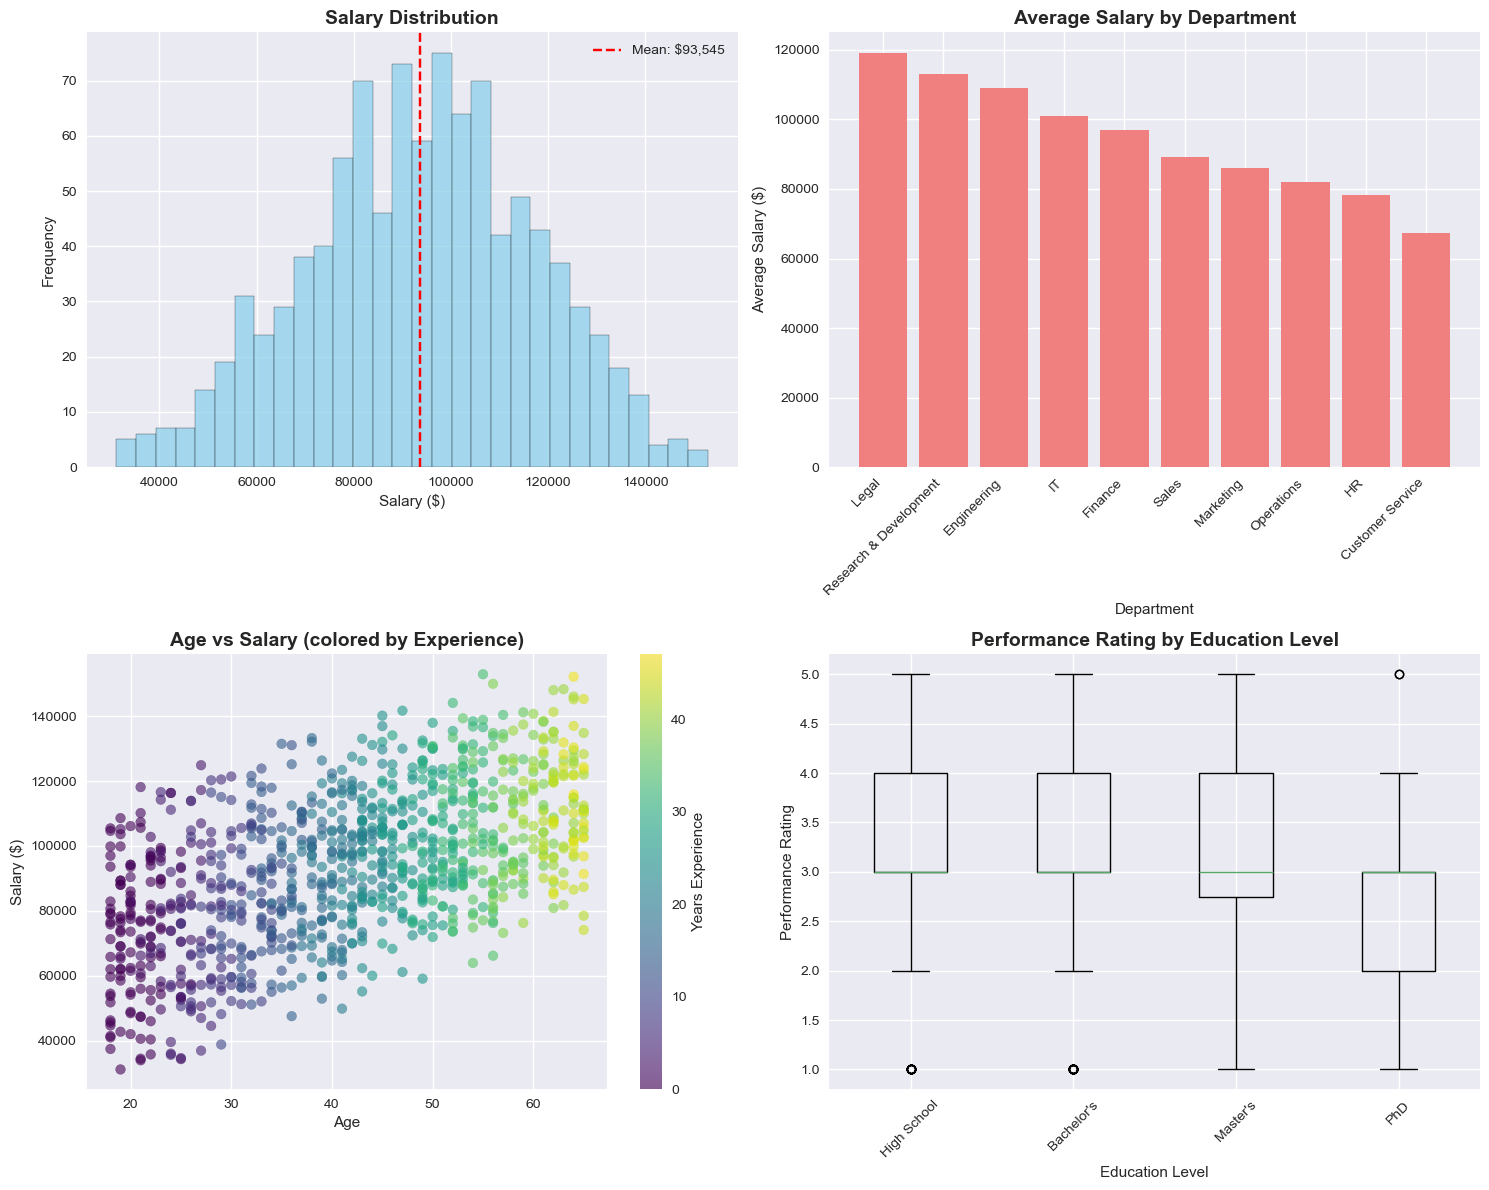

📊 Visualizations created successfully!


In [27]:
# MATPLOTLIB VISUALIZATIONS
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogram - Salary Distribution
axes[0, 0].hist(df['Salary'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Salary Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Salary ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Salary'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${df["Salary"].mean():,.0f}')
axes[0, 0].legend()

# 2. Bar Chart - Average Salary by Department
dept_avg = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
axes[0, 1].bar(range(len(dept_avg)), dept_avg.values, color='lightcoral')
axes[0, 1].set_title('Average Salary by Department', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Department')
axes[0, 1].set_ylabel('Average Salary ($)')
axes[0, 1].set_xticks(range(len(dept_avg)))
axes[0, 1].set_xticklabels(dept_avg.index, rotation=45, ha='right')

# 3. Scatter Plot - Age vs Salary
scatter = axes[1, 0].scatter(df['Age'], df['Salary'], alpha=0.6, 
                           c=df['YearsExperience'], cmap='viridis')
axes[1, 0].set_title('Age vs Salary (colored by Experience)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Salary ($)')
plt.colorbar(scatter, ax=axes[1, 0], label='Years Experience')

# 4. Box Plot - Performance Rating by Education Level
education_order = ['High School', 'Bachelor\'s', 'Master\'s', 'PhD']
box_data = [df[df['EducationLevel'] == edu]['PerformanceRating'].values 
            for edu in education_order]
axes[1, 1].boxplot(box_data, labels=education_order)
axes[1, 1].set_title('Performance Rating by Education Level', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Education Level')
axes[1, 1].set_ylabel('Performance Rating')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("📊 Visualizations created successfully!")

## 🎯 ADVANCED PRACTICE EXERCISES

Try these exercises to master pandas, numpy, and matplotlib:

In [28]:
# PRACTICE EXERCISES - TRY THESE!

print("🎯 PRACTICE EXERCISES:")
print("=" * 50)

print("1. PANDAS CHALLENGES:")
print("   • Find the employee with the highest satisfaction score in each department")
print("   • Create a pivot table showing average salary by Department and Education Level")
print("   • Find employees who earn more than the average in their department")
print("   • Calculate the correlation between Age, Salary, and Satisfaction Score")

print(f"\n2. NUMPY CHALLENGES:")
print("   • Create a salary classification: Low (<50k), Medium (50k-80k), High (>80k)")
print("   • Calculate the z-score for each employee's salary")
print("   • Find outliers in the satisfaction scores (values > 2 standard deviations)")
print("   • Create a performance bonus matrix based on rating and years of experience")

print(f"\n3. MATPLOTLIB CHALLENGES:")
print("   • Create a correlation heatmap of numerical columns")
print("   • Make a multi-subplot figure showing salary trends by different categories")
print("   • Create an interactive plot showing salary distribution by city")
print("   • Design a dashboard-style visualization with multiple charts")

print(f"\n4. COMBINED CHALLENGES:")
print("   • Identify the most 'overpaid' and 'underpaid' employees based on their profile")
print("   • Create a employee recommendation system based on performance and satisfaction")
print("   • Build a salary prediction model using available features")
print("   • Generate a comprehensive data report with insights and visualizations")

print(f"\n💡 TIP: Start with the exercises above and gradually work your way through!")
print("    Each exercise will help you master different aspects of these libraries.")

🎯 PRACTICE EXERCISES:
1. PANDAS CHALLENGES:
   • Find the employee with the highest satisfaction score in each department
   • Create a pivot table showing average salary by Department and Education Level
   • Find employees who earn more than the average in their department
   • Calculate the correlation between Age, Salary, and Satisfaction Score

2. NUMPY CHALLENGES:
   • Create a salary classification: Low (<50k), Medium (50k-80k), High (>80k)
   • Calculate the z-score for each employee's salary
   • Find outliers in the satisfaction scores (values > 2 standard deviations)
   • Create a performance bonus matrix based on rating and years of experience

3. MATPLOTLIB CHALLENGES:
   • Create a correlation heatmap of numerical columns
   • Make a multi-subplot figure showing salary trends by different categories
   • Create an interactive plot showing salary distribution by city
   • Design a dashboard-style visualization with multiple charts

4. COMBINED CHALLENGES:
   • Identify the

In [29]:
# SAVE THE DATASET TO CSV FOR FUTURE USE
df.to_csv('employee.csv', index=False)
print("✅ Dataset saved as 'large_employee_dataset.csv'")

# Display final summary
print(f"\n🎉 COMPREHENSIVE DATASET READY!")
print(f"📊 {len(df):,} employees across {len(df['Department'].unique())} departments")
print(f"🏙️ {len(df['City'].unique())} cities represented")
print(f"💼 {len(df['JobTitle'].unique())} different job titles")
print(f"💰 Salary range: ${df['Salary'].min():,} - ${df['Salary'].max():,}")
print(f"📈 Average satisfaction: {df['SatisfactionScore'].mean():.1f}/10")

print(f"\n🔥 YOU CAN NOW PRACTICE:")
print("✅ Pandas: filtering, grouping, aggregation, merging, pivoting")
print("✅ NumPy: statistical operations, array manipulations, mathematical functions") 
print("✅ Matplotlib: histograms, scatter plots, bar charts, box plots, heatmaps")
print("✅ Data Analysis: correlation analysis, outlier detection, trend analysis")

✅ Dataset saved as 'large_employee_dataset.csv'

🎉 COMPREHENSIVE DATASET READY!
📊 1,000 employees across 10 departments
🏙️ 35 cities represented
💼 36 different job titles
💰 Salary range: $31,138 - $152,890
📈 Average satisfaction: 7.0/10

🔥 YOU CAN NOW PRACTICE:
✅ Pandas: filtering, grouping, aggregation, merging, pivoting
✅ NumPy: statistical operations, array manipulations, mathematical functions
✅ Matplotlib: histograms, scatter plots, bar charts, box plots, heatmaps
✅ Data Analysis: correlation analysis, outlier detection, trend analysis


In [30]:
filtered_df = df.loc[df['City'].str.contains('C', case=True)]

print("Filtered DataFrame:")
print(filtered_df)

Filtered DataFrame:
     EmployeeID            Name  Age  Gender           City  \
5             6   Bella Johnson   38    Male       Columbus   
8             9       Bob Moore   40    Male        Chicago   
24           25     Diana Moore   50  Female      Charlotte   
30           31    Emma Johnson   59    Male       Columbus   
42           43    Peter Garcia   35  Female       Columbus   
..          ...             ...  ...     ...            ...   
975         976  Chris Williams   41    Male      Charlotte   
983         984    Olivia Brown   32    Male       Columbus   
985         986  Isabella Davis   47    Male  Oklahoma City   
991         992   Tina Gonzalez   43  Female        Chicago   
999        1000     Wendy Jones   37  Female        Chicago   

                 Department                JobTitle  Salary  YearsExperience  \
5                     Legal           Legal Counsel  132129               16   
8               Engineering         DevOps Engineer  104390    

In [31]:
# using regex
filtered_df_regex = df.loc[df['City'].str.contains('^C', regex=True)]
print("Filtered DataFrame using regex:")
print(filtered_df_regex)

Filtered DataFrame using regex:
     EmployeeID               Name  Age  Gender       City  \
5             6      Bella Johnson   38    Male   Columbus   
8             9          Bob Moore   40    Male    Chicago   
24           25        Diana Moore   50  Female  Charlotte   
30           31       Emma Johnson   59    Male   Columbus   
42           43       Peter Garcia   35  Female   Columbus   
..          ...                ...  ...     ...        ...   
951         952  Isabella Williams   23    Male  Charlotte   
975         976     Chris Williams   41    Male  Charlotte   
983         984       Olivia Brown   32    Male   Columbus   
991         992      Tina Gonzalez   43  Female    Chicago   
999        1000        Wendy Jones   37  Female    Chicago   

                 Department                JobTitle  Salary  YearsExperience  \
5                     Legal           Legal Counsel  132129               16   
8               Engineering         DevOps Engineer  104390    